Podatkovno rudarenje: PROJEKT.

Nesreče v Britanije.

Avtor: Stepan Leonov.

01. 06. 2

In [37]:
from collections import defaultdict
from csv import DictReader
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))
s1 = []
for row in reader:
    s1.append((int(row["Number_of_Vehicles"]), row["Date"]))
max_s = 0
max_d = ""
for e in s1:
    if e[0] > max_s:
        max_s = e[0]
        max_d = e[1]

#največje število vozil v mesreče datuma ....
print("najvecje stevilo vozil v nesrece je bilo " + str(max_s) + ", to je bilo na datum: " + max_d)

najvecje stevilo vozil v nesrece je bilo 67, to je bilo na datum: 05/09/2013


najvec zrtv pri nesrece je bilo 93, to je bilo na datum: 20. 10. 2014.

V letu 2005 je bilo v vseh nesrečih 271017 žrtv.
V letu 2006 je bilo v vseh nesrečih 258404 žrtv.
V letu 2007 je bilo v vseh nesrečih 247780 žrtv.
V letu 2009 je bilo v vseh nesrečih 222146 žrtv.
V letu 2010 je bilo v vseh nesrečih 208648 žrtv.
V letu 2011 je bilo v vseh nesrečih 203950 žrtv.
V letu 2012 je bilo v vseh nesrečih 241954 žrtv.
V letu 2013 je bilo v vseh nesrečih 183670 žrtv.
V letu 2014 je bilo v vseh nesrečih 194477 žrtv.


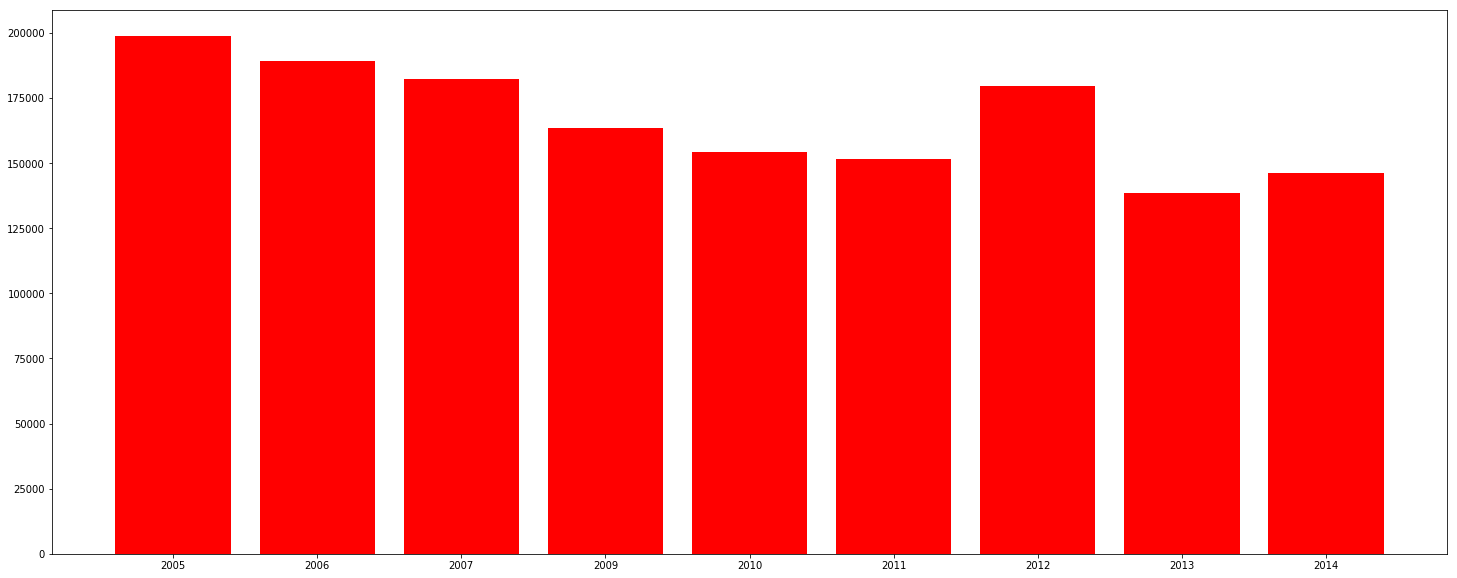

In [36]:
#število žrtv v nesrečih glede na datum
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))
d1 = defaultdict(int)
d2 = defaultdict(int)
d3 = defaultdict(int)
d4 = defaultdict(list)

s2 = []

max_s = 0
max_d = ""

for row in reader:
    s2.append((int(row["Number_of_Casualties"]), row["Date"].split("/")))

for e in s2:
    if e[0] > max_s:
        max_s = e[0]
        max_d = e[1]

#največje število žrtv pri nesreče datuma ....
print("najvec zrtv pri nesrece je bilo " + str(max_s) + ", to je bilo na datum: " + max_d[0] + ". " + max_d[1] + ". " + max_d[2] + ".")
print()

for e2 in s2:
    d1[e2[1][2]] += 1
    d2[e2[1][2]] += e2[0]

d1 = dict(d1)
d2 = dict(d2)

for k in d2.keys():
    print("V letu " + k + " je bilo v vseh nesrečih " + str(d2[k]) + " žrtv.")

import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
x = range(len(list(d1)))
plt.bar(x, height=list(d1.values()), tick_label=(list(d1.keys())), color="red") 
plt.show()

for e3 in s2:
    d3[e3[1][1] + ":" + e3[1][2]] += e3[0]
d3 = dict(d3)

for k3 in d3.keys():
    d4[k3[:2]].append(d3[k3])
d4 = dict(d4)

ks = list(d4.values())



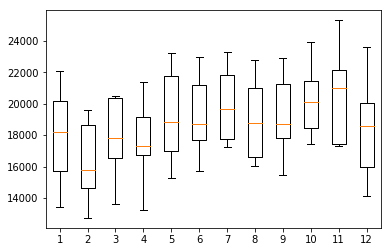

In [3]:
plt.boxplot(ks);

In [17]:
#tip ceste in hitrost
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))
d1 = defaultdict(list)
d2 = defaultdict(list)
for row in reader:
    d1[row["Road_Type"]].append(int(row["Number_of_Casualties"]))
    d2[row["Speed_limit"]].append(int(row["Number_of_Casualties"]))
d1 = dict(d1)
d2 = dict(d2)

st_nesrec_tip_ceste = {}
nevaren_tip_ceste = ""
dober_tip_ceste = "" 

st_nesrec_om_hitrosti = {}
nevarna_om_hitr = ""
dobra_om_hitr = ""

#na katerem tipu ceste je bilo največ žrtv pri nesrečih, in se prikaže, povprečno število nesreč na različnih tipih cest.
n1 = 0
n2 = 10000000000
for k in d1.keys():
    st_nesrec_tip_ceste[k] = len(d1[k])
    if sum(d1[k]) > n1:
        n1 = sum(d1[k])
        nevaren_tip_ceste = k
    elif sum(d1[k]) < n2:
        n2 = sum(d1[k])
        dober_tip_ceste = k

print("največje število žrtv pri nesrečih je bilo na tipu ceste " + nevaren_tip_ceste + ", jih je bilo " + str(n1))
print("najmanjše število žrtv pri nesrečih je bilo na tipu ceste " + dober_tip_ceste + ", jih je bilo " + str(n2))
print()

n5 = 0
n6 = 10000000000
#pri katere omejitve hitrosti je bilo največ žrtv pri nesrečih, in se prikaže, povprečno število nesreč pri različnih omejitvih hitrosti.
for k2 in d2.keys():
    st_nesrec_om_hitrosti[k2] = len(d2[k2])
    if sum(d2[k2]) > n5:
        n5 = sum(d2[k2])
        nevarna_om_hitr = k2
    elif sum(d2[k2]) < n6:
        n6 = sum(d2[k2])
        dobra_om_hitr = k2        
print("največje število žrtv pri nesrečih je bilo na ceste z omejitvejo " + nevarna_om_hitr + " milj na uro, jih je bilo " + str(n5))
print("najmanjše število žrtv pri nesrečih je bilo na ceste z omrjitvejo " + dobra_om_hitr + " milj na uro, jih je bilo " + str(n6))
print()

največje število žrtv pri nesrečih je bilo na tipu ceste Single carriageway, jih je bilo 1506994
najmanjše število žrtv pri nesrečih je bilo na tipu ceste Unknown, jih je bilo 10394

največje število žrtv pri nesrečih je bilo na ceste z omejitvejo 30 milj na uro, jih je bilo 1229007
najmanjše število žrtv pri nesrečih je bilo na ceste z omrjitvejo 15 milj na uro, jih je bilo 11



In [19]:
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))
d6 = defaultdict(list)
for row in reader:
    d6[row["Weather_Conditions"]].append(int(row["Number_of_Casualties"]))
d6 = dict(d6)
#print(d6)
st_nesrec_vreme = {}
nevarno_vreme = ""
dobro_vreme = ""
n3 = 0
n4 = 10000000000

#vreme, ki pri njem bilo največ in najmanj žrtv v nesrečih
for k in d6.keys():
    st_nesrec_vreme[k] = len(d6[k])
    if k != "" and sum(d6[k]) > n3:
        n3 = sum(d6[k])
        nevarno_vreme = k
    elif k != "" and sum(d6[k]) < n4:
        n4 = sum(d6[k])
        dobro_vreme = k
print("največje število žrtv pri nesrečih je bilo pri vremenu " + nevarno_vreme + ", jih je bilo " + str(n3))
print("najmanjše število žrtv pri nesrečih je bilo pri vremenu " + dobro_vreme + ", jih je bilo " + str(n4))
print()
    


največje število žrtv pri nesrečih je bilo pri vremenu Fine without high winds, jih je bilo 1619795
najmanjše število žrtv pri nesrečih je bilo pri vremenu Snowing with high winds, jih je bilo 2781

največje število žrtv pri nesrečih je bilo pri ob -e uri, jih je bilo 0
najmanjše število žrtv pri nesrečih je bilo pri ob -e uri, jih je bilo 10000000000


In [21]:
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))
d9 = defaultdict(list)
for row in reader:
    d9[row["Time"].split(":")[0]].append(int(row["Number_of_Casualties"]))
d9 = dict(d9)

#ura, ki v njo bilo največ žrtv v nesrečih
n7 = 0
n8 = 10000000000
st_nesrec_ura = {}
dobra_ura = ""
nevarna_ura = ""
for c in d9.keys():
    st_nesrec_ura[c] = len(d9[c]) 
    if c != "" and sum(d9[c]) > n7:
        n7 = sum(d9[c])
        nevarna_ura = c
    elif c != "" and sum(d9[c]) < n8:
        n8 = sum(d9[c])
        dobra_ura = c
print("največje število žrtv pri nesrečih je bilo pri ob " + nevarna_ura + "-e uri, jih je bilo " + str(n7))
print("najmanjše število žrtv pri nesrečih je bilo pri ob " + dobra_ura + "-e uri, jih je bilo " + str(n8))


največje število žrtv pri nesrečih je bilo pri ob 17-e uri, jih je bilo 178340
najmanjše število žrtv pri nesrečih je bilo pri ob 04-e uri, jih je bilo 11546


<BarContainer object of 6 artists>

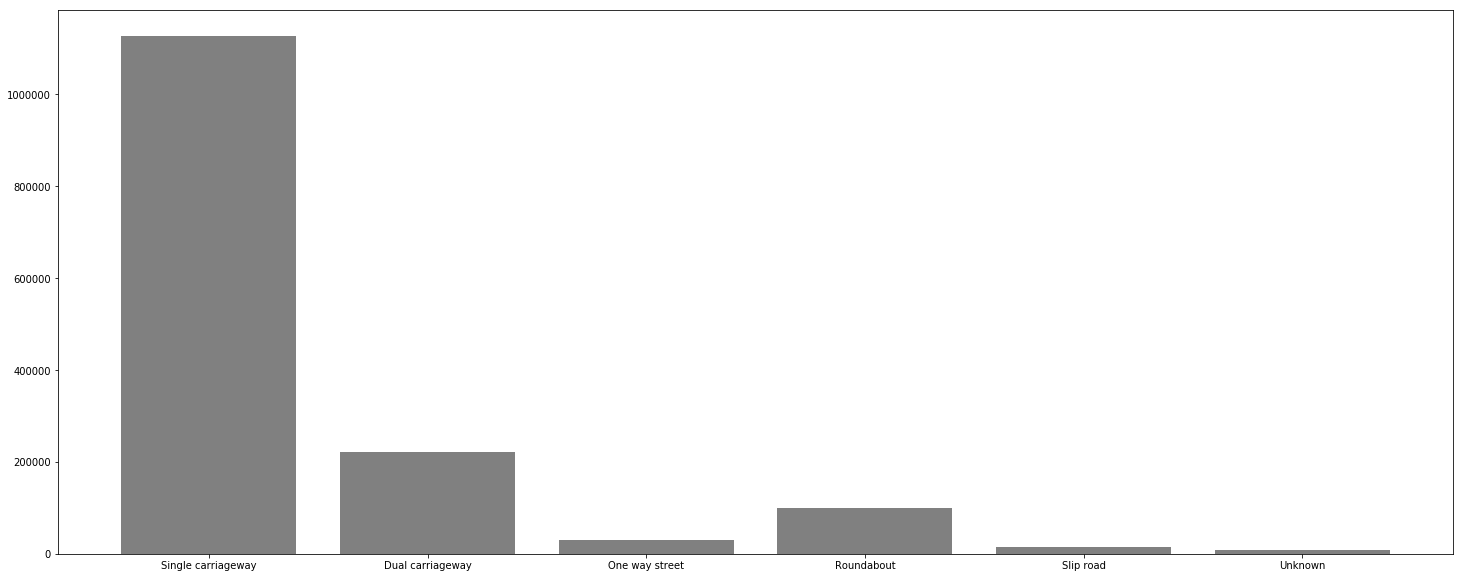

In [32]:
plt.figure(figsize=(25, 10))
x2 = range(len(list(st_nesrec_tip_ceste.keys())))
plt.bar(x2, height=list(st_nesrec_tip_ceste.values()), tick_label=(list(st_nesrec_tip_ceste.keys())), color="grey")

<BarContainer object of 8 artists>

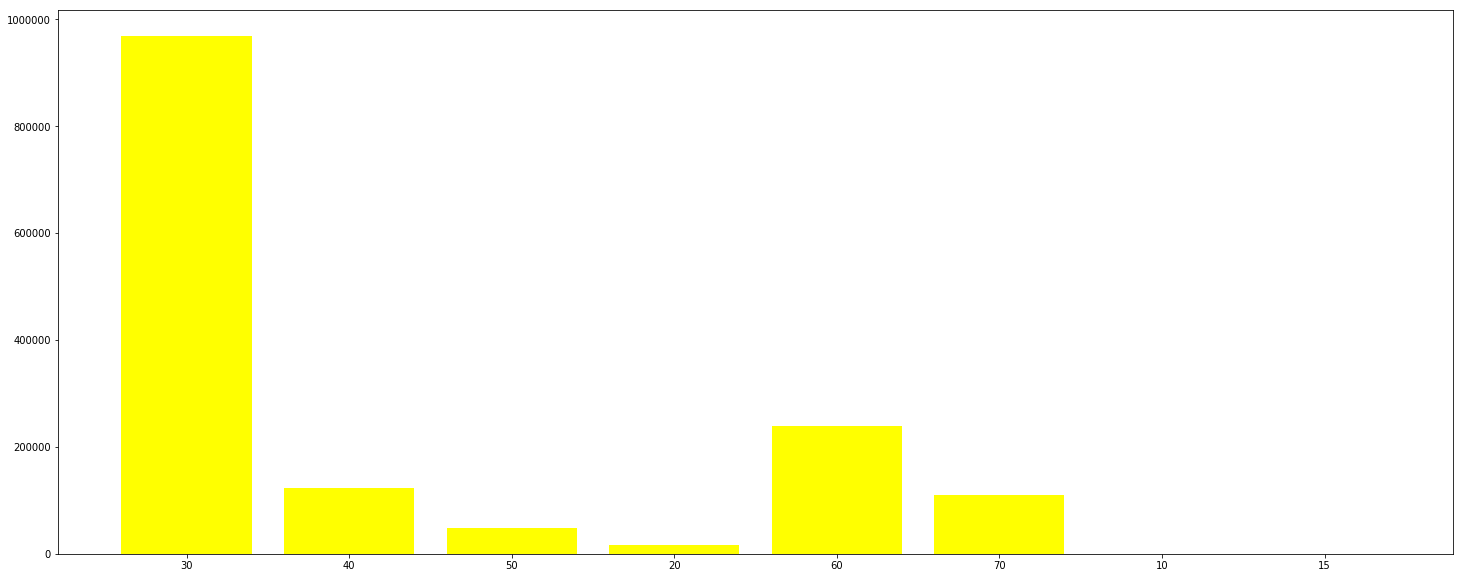

In [33]:
plt.figure(figsize=(25, 10))
x2 = range(len(list(st_nesrec_om_hitrosti.keys())))
plt.bar(x2, height=list(st_nesrec_om_hitrosti.values()), tick_label=(list(st_nesrec_om_hitrosti.keys())), color="yellow")

<BarContainer object of 10 artists>

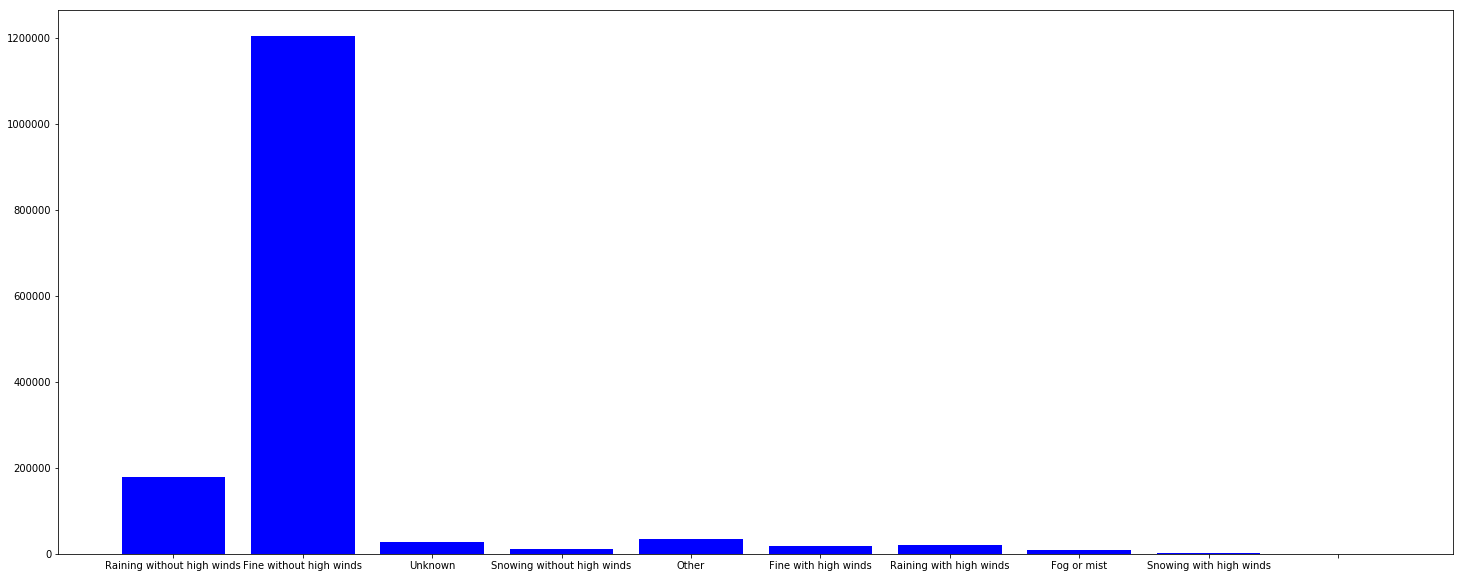

In [34]:
plt.figure(figsize=(25, 10))
x2 = range(len(list(st_nesrec_vreme.keys())))
plt.bar(x2, height=list(st_nesrec_vreme.values()), tick_label=(list(st_nesrec_vreme.keys())), color="blue")

<BarContainer object of 25 artists>

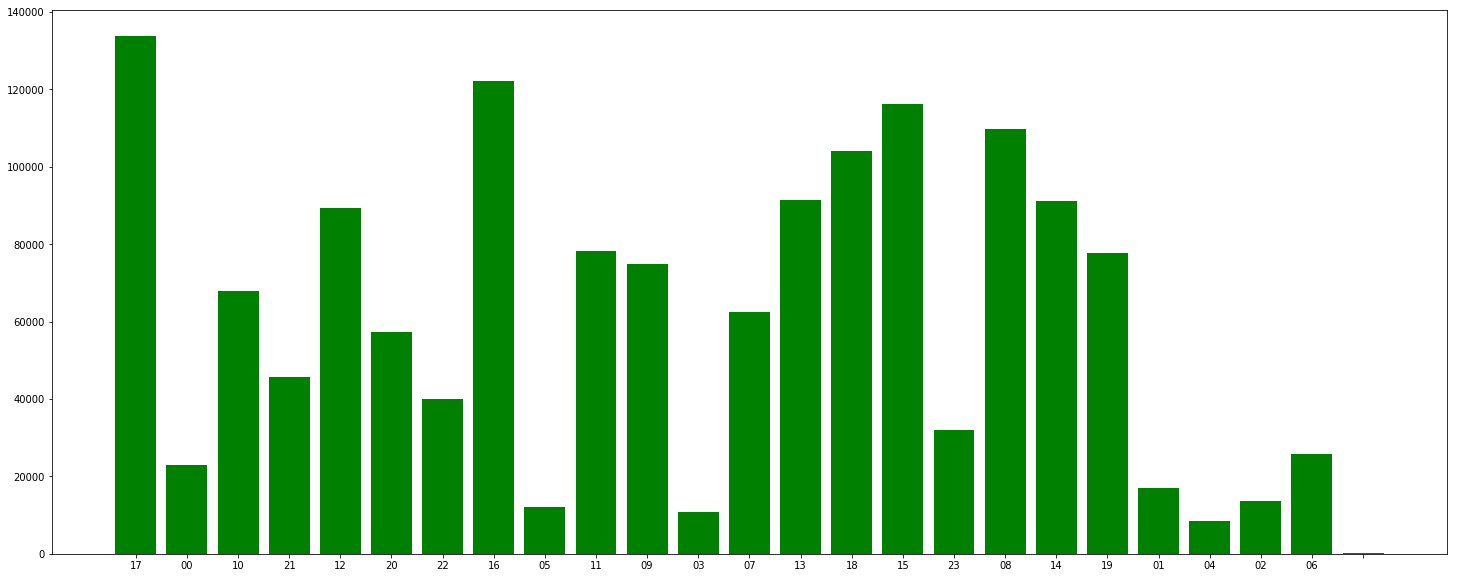

In [35]:
plt.figure(figsize=(25, 10))
x2 = range(len(list(st_nesrec_ura.keys())))
plt.bar(x2, height=list(st_nesrec_ura.values()), tick_label=(list(st_nesrec_ura.keys())), color="green")

In [25]:
import geopandas as gpd
import pandas as pd
shape_file = gpd.read_file('Ukboundaryline71.shp')
df = pd.read_csv('1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv')

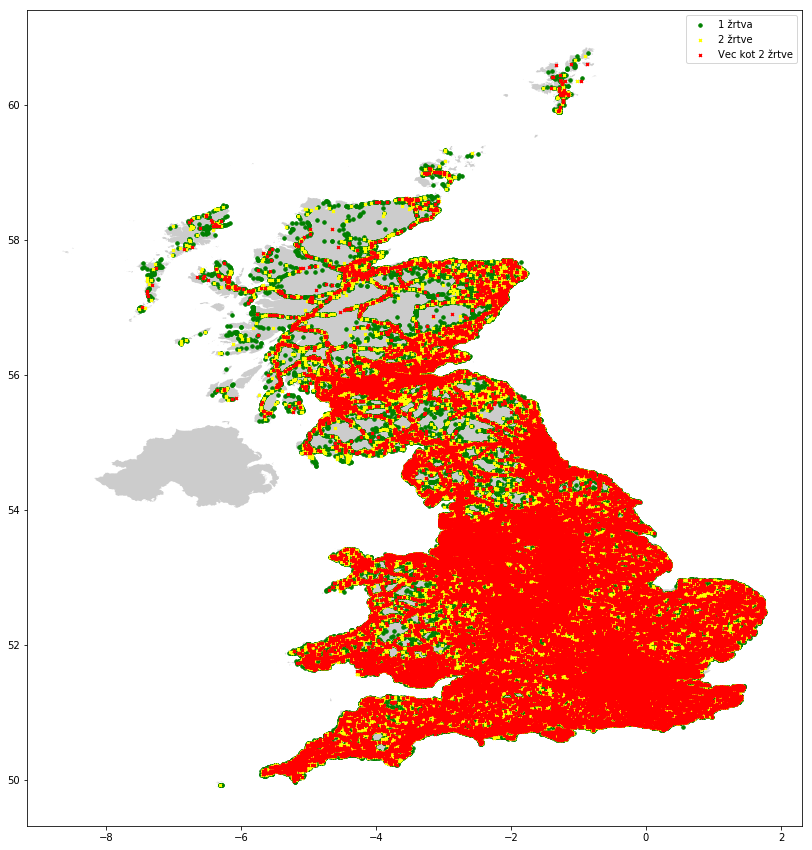

In [26]:
#vizualizacija
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

# vizualiziraj "shape file"
#fig, ax = plt.subplots(figsize=(15,15))
#shape_file.plot(ax=ax)

# import podatke
crs = {'init' : 'epsg: 4326'}  # Coordinate Reference System
df.head()

# kreiranje točk
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

# kreiraj geografski DataFrame
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

# vizualizacija
fig, ax = plt.subplots(figsize=(15,15))
shape_file.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df["Number_of_Casualties"].astype(int) == 1].plot(ax=ax, color='green', marker='o', label='1 žrtva', markersize=12)
geo_df[geo_df["Number_of_Casualties"].astype(int) == 2].plot(ax=ax, color='yellow', marker='x', label='2 žrtve', markersize=8)
geo_df[geo_df["Number_of_Casualties"].astype(int) > 2].plot(ax=ax, color='red', marker='x', label='Vec kot 2 žrtve', markersize=8)

plt.legend();

In [18]:
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))

In [4]:
#od česa je odvisno, ali ljudi čakajo policijo pri nesreče, ali ne?
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))

d7 = []
for row in reader:
    key = row["Did_Police_Officer_Attend_Scene_of_Accident"]
    value = row["Time"].split(":")[0]
    d7.append((key, value))


brez_policiji = defaultdict(int)
for e in d7:
    if e[0] == "No":
        brez_policiji[e[1]] += 1
bp = dict(brez_policiji)

for g in bp.keys():
    if g != "":
        print("Ob " + str(g) + "-e ure je pri " + str(bp[g]) + "-h nesrečih ljudi niso čakali policijo")
print()



Ob 21-e ure je pri 6421-h nesrečih ljudi niso čakali policijo
Ob 17-e ure je pri 27954-h nesrečih ljudi niso čakali policijo
Ob 12-e ure je pri 17820-h nesrečih ljudi niso čakali policijo
Ob 18-e ure je pri 20719-h nesrečih ljudi niso čakali policijo
Ob 19-e ure je pri 13793-h nesrečih ljudi niso čakali policijo
Ob 15-e ure je pri 24956-h nesrečih ljudi niso čakali policijo
Ob 03-e ure je pri 1127-h nesrečih ljudi niso čakali policijo
Ob 16-e ure je pri 24996-h nesrečih ljudi niso čakali policijo
Ob 13-e ure je pri 18361-h nesrečih ljudi niso čakali policijo
Ob 23-e ure je pri 3682-h nesrečih ljudi niso čakali policijo
Ob 08-e ure je pri 24778-h nesrečih ljudi niso čakali policijo
Ob 00-e ure je pri 2323-h nesrečih ljudi niso čakali policijo
Ob 11-e ure je pri 15193-h nesrečih ljudi niso čakali policijo
Ob 22-e ure je pri 4965-h nesrečih ljudi niso čakali policijo
Ob 09-e ure je pri 14471-h nesrečih ljudi niso čakali policijo
Ob 01-e ure je pri 1752-h nesrečih ljudi niso čakali policij

In [31]:
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))

#policija vs vreme.
d8 = []

for row in reader:
    k = row["Did_Police_Officer_Attend_Scene_of_Accident"]
    if row["Road_Type"] != "":
        v = row["Road_Type"]
    d8.append((k, v))
    
brez_policiji2 = defaultdict(int)
for e in d8:
    if e[0] == "No":
        brez_policiji2[e[1]] += 1
bp2 = dict(brez_policiji2)

for g in bp2.keys():
    if bp2[g] != 0:
        print("na tipu ceste " + str(g) + " je pri " + str(bp2[g]) + "-h nesrečih ljudi niso čakali policijo")
print()
        


na tipu ceste Single carriageway je pri 210863-h nesrečih ljudi niso čakali policijo
na tipu ceste One way street je pri 8405-h nesrečih ljudi niso čakali policijo
na tipu ceste Dual carriageway je pri 30428-h nesrečih ljudi niso čakali policijo
na tipu ceste Roundabout je pri 26401-h nesrečih ljudi niso čakali policijo
na tipu ceste Unknown je pri 3192-h nesrečih ljudi niso čakali policijo
na tipu ceste Slip road je pri 3062-h nesrečih ljudi niso čakali policijo



In [30]:
reader = DictReader(open("1-6m-accidents-traffic-flow-over-16-years/Accidents_2005_to_2014.csv", "rt", encoding="utf-8"))

d10 = []
for row in reader:
    k2 = row["Did_Police_Officer_Attend_Scene_of_Accident"]
    if row["Weather_Conditions"] != "":
        v2 = row["Weather_Conditions"]
    d10.append((k2, v2))
    
brez_policiji3 = defaultdict(int)

for e in d10:
    if e[0] == "No":
        brez_policiji3[e[1]] += 1
bp3 = dict(brez_policiji3)

for g in bp3.keys():
    if bp3[g] != 0:
        print("v " + str(g) + " je pri " + str(bp3[g]) + "-h nesrečih ljudi niso čakali policijo")


v Fine without high winds je pri 225748-h nesrečih ljudi niso čakali policijo
v Unknown je pri 15726-h nesrečih ljudi niso čakali policijo
v Raining without high winds je pri 25335-h nesrečih ljudi niso čakali policijo
v Fine with high winds je pri 3137-h nesrečih ljudi niso čakali policijo
v Other je pri 6297-h nesrečih ljudi niso čakali policijo
v Snowing without high winds je pri 2021-h nesrečih ljudi niso čakali policijo
v Fog or mist je pri 957-h nesrečih ljudi niso čakali policijo
v Raining with high winds je pri 2843-h nesrečih ljudi niso čakali policijo
v Snowing with high winds je pri 287-h nesrečih ljudi niso čakali policijo
